# Equivalent layer technique for estimating total magnetization direction using 

#### Importing libraries

In [1]:
% matplotlib inline 

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import datetime
import timeit
import string as st
from scipy.optimize import nnls
from fatiando.gridder import regular
from fatiando.utils import ang2vec, vec2ang
from fatiando.mesher import Sphere, PointGrid,Prism
from fatiando.gravmag import sphere,prism
from fatiando.constants import CM, T2NT, G, SI2MGAL

/home/andrelreis/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [3]:
notebook_name = 'airborne_EQL_magdirection_RM_calculation.ipynb'

#### Importing auxiliary functions

In [4]:
dir_modules = '../../../mypackage'
sys.path.append(dir_modules)

In [5]:
import auxiliary_functions as fc

#### Loading properties of the model

In [6]:
with open('data/model_multi.pickle') as f:
        model_multi = pickle.load(f)

#### Loading properties grid

In [7]:
with open('data/airborne_survey.pickle') as f:
        airborne = pickle.load(f)

#### Loading data

In [8]:
with open('data/data_set.pickle') as f:
        data = pickle.load(f)

#### Open a dictionary

In [9]:
result_RM_airb = dict()

### Saving files

In [10]:
saved_files = []

## Observation area

In [11]:
print 'Area limits: \n x_max = %.1f m \n x_min = %.1f m \n y_max = %.1f m \n y_min = %.1f m' % (airborne['area'][1], 
                                                                                                airborne['area'][0],
                                                                                                airborne['area'][3],
                                                                                                airborne['area'][2])

Area limits: 
 x_max = 6000.0 m 
 x_min = -6000.0 m 
 y_max = 6000.0 m 
 y_min = -6000.0 m


### airborne survey information

In [12]:
print 'Shape : (%.0f,%.0f)'% airborne['shape'] 
print 'Number of data: %.1f' % airborne['N']
print 'dx: %.1f m' % airborne['dx']
print 'dy: %.1f m ' % airborne['dy']

Shape : (55,25)
Number of data: 1375.0
dx: 222.2 m
dy: 500.0 m 


## Properties of the model

### Main field

In [13]:
inc_gf,dec_gf = model_multi['main_field']

In [14]:
print'Main field inclination: %.1f degree' % inc_gf
print'Main field declination: %.1f degree' % dec_gf

Main field inclination: -20.0 degree
Main field declination: -20.0 degree


### Magnetization direction

In [15]:
print 'Inclination: %.1f degree' % model_multi['inc_R']
print 'Declination: %.1f degree' % model_multi['dec_R']

Inclination: -45.0 degree
Declination: 50.0 degree


In [16]:
inc_R,dec_R = model_multi['inc_R'],model_multi['dec_R']

## Generating the layer with my function 

In [17]:
h = 1150.

#### Generating a layer

In [18]:
shape_layer = (airborne['shape'][0],airborne['shape'][1])

In [19]:
xs,ys,zs = regular(airborne['area'],shape_layer,h)

### Levenberg-Marquardt with NNLS for positive magnetic moments

In [20]:
i_pos = 1250

In [21]:
it_max = 30

In [22]:
it_marq = 15

In [23]:
lamb = 10.
dlamb = 100.

In [24]:
eps_e = 1e-4
eps_i = 1e-4

In [25]:
mu_list = [1e-6,1e2,1e3,1e4,1e5,1e6,5*1e6]

In [26]:
mu_norm = []
norm_r = []
norm_m = []
m_est = []
incl_est = []
decl_est = []
phi_list = []
for i in mu_list:
    m_LM,inc_est,dec_est,phi,imax,pest,incs,decs = fc.levenberg_marquardt_NNLS(
        data['tfa_obs_RM_airb'],airborne['x'],airborne['y'],
        airborne['z'],xs,ys,zs,inc_gf,dec_gf,-10.,-10.,lamb,dlamb,i_pos,it_max,
        it_marq,eps_e,eps_i,i)
    G = fc.sensitivity_mag(airborne['x'],airborne['y'],airborne['z'],
                       xs,ys,zs,inc_gf,dec_gf,inc_est,dec_est)
    tfpred = np.dot(G,m_LM)
    r = data['tfa_obs_RM_airb'] - tfpred 
    
    norm_r.append(np.sqrt(np.sum(r*r)))
    norm_m.append(np.sqrt(np.sum(m_LM*m_LM)))
    m_est.append(m_LM)
    incl_est.append(inc_est)
    decl_est.append(dec_est)
    phi_list.append(phi)

i = 0
-21.162693303 -12.4584389046
0.141401820541
i = 1
-29.0983092081 -12.2984193904
0.119290826309
i = 2
-34.677677135 -11.9338488204
0.079259061749
i = 3
-39.0580770428 -11.3953016639
0.0583919542288
i = 4
-42.5933621263 -10.5920534685
0.0436375544068
i = 5
-45.4344487129 -9.55108951518
0.0314500409604
i = 6
-47.7710526129 -8.21910702953
0.0237404771984
i = 7
-49.7505259241 -6.65873979454
0.0190420507625
i = 8
-51.4335398794 -4.88381848467
0.0157069587739
i = 9
-52.8615307398 -2.9412327136
0.0131630479533
i = 10
-54.0796794216 -0.842980324801
0.011468769019
i = 11
-55.1074450176 1.46754213576
0.0105338224416
i = 12
-55.9454223697 3.97088321246
0.00981992809757
i = 13
-56.6003656507 6.6752605164
0.00953753307728
i = 14
-57.0761567958 9.52704180068
0.00935166904902
i = 15
-57.3781485676 12.4769418515
0.00927239090492
i = 16
-57.5183509076 15.4983475756
0.00944782970588
i = 17
-57.5059885598 18.531277409
0.00962686476197
i = 18
-57.3577135669 21.5061590434
0.00969235660496
i = 19
-57.0

-57.076153902 9.5270713935
0.00934327445042
i = 15
-57.378144828 12.4769726368
0.00926397868643
i = 16
-57.5183461744 15.4983807929
0.00943924272055
i = 17
-57.505982537 18.5313122467
0.0096181614128
i = 18
-57.3577064055 21.506193997
0.0096835602554
i = 19
-57.0942844251 24.3612369385
0.00958899727767
i = 20
-56.7399934963 27.0474272454
0.0093077483072
i = 21
-56.3206411443 29.5307171267
0.00883251185036
i = 22
-55.8600662011 31.796252365
0.00821192084144
i = 23
-55.3835273083 33.8320227685
0.00740615341403
i = 24
-54.9092047682 35.6501799048
0.00656021872315
i = 25
-54.4482044591 37.2729925185
0.00575596927413
i = 26
-54.001583786 38.7119694653
0.00497886710823
i = 27
-53.5820586923 39.9707618287
0.00415415356977
i = 28
-53.2036661694 41.0499927522
0.00328466853994
i = 29
-52.8614942852 41.9849857415
0.00262627667081
i = 30
-52.5542341674 42.7933644889
0.00207594173417
i = 31
-52.2861958017 43.4897936663
0.00160026337819
i = 32
-52.0528661226 44.0912443099
0.00123057102634
i = 33
-51

-53.2264877235 41.1794733034
0.00293158938328
i = 29
-52.8979564372 42.1080702193
0.0023300004943
i = 30
-52.6046784512 42.9106137943
0.00183149575282
i = 31
-52.3490005431 43.6028077558
0.00141187643566
i = 32
-52.1276561642 44.2013928771
0.00108379050467
i = 33
-51.919548081 44.7421520659
0.000921917488777
i = 34
-51.7163814065 45.2415130006
0.000825884176622
i = 35
-51.5162792703 45.7054575323
0.00075115678602
i = 36
-51.318438254 46.139012661
0.000691664631021
i = 37
-51.1221847282 46.5467296227
0.000644920250248
i = 38
-50.9281511728 46.9303088292
0.000601328318951
i = 39
-50.7364922682 47.2902355012
0.000559458033071
i = 40
-50.5468936022 47.6260543957
0.000518829998714
i = 41
-50.3600028955 47.9390364426
0.000480341753912
i = 42
-50.1765227824 48.2306654605
0.00044397309023
i = 43
-49.9973785182 48.5009532982
0.00040681039499
i = 44
-49.8226851029 48.7514968473
0.000373067573001
i = 45
-49.6519480813 48.9851624883
0.000345492750764
i = 46
-49.4852480999 49.2042037552
0.000321467

## L-curve visualization

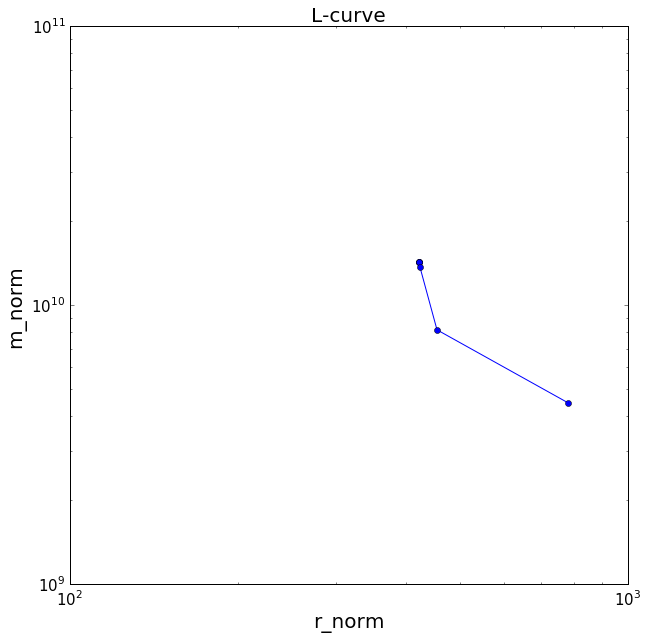

In [27]:
title_font = 20
bottom_font = 18
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(9,9), tight_layout=True)

plt.figure(figsize=(10, 10))
plt.loglog(norm_r,norm_m, 'b-')
plt.loglog(norm_r,norm_m, 'bo')
plt.title('L-curve', fontsize=title_font)
plt.xlabel('r_norm', fontsize = title_font)
plt.ylabel('m_norm', fontsize = title_font)
plt.tick_params(axis='both', which='major', labelsize=15)

file_name = 'figs/airborne/Lcurve_RM'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')


plt.show()

### Results

In [28]:
result_RM_airb['magnetic_moment'] = m_est
result_RM_airb['inc_est'] = incl_est
result_RM_airb['dec_est'] = decl_est
result_RM_airb['layer_depth'] = h
result_RM_airb['reg_parameter'] = mu_list
result_RM_airb['phi'] = phi_list

### Generating .pickle file

In [29]:
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
result_RM_airb['metadata'] = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)

In [30]:
file_name = 'data/result_RM_airb.pickle'
with open(file_name, 'w') as f:
    pickle.dump(result_RM_airb, f)
    
saved_files.append(file_name)

### Saved files

In [31]:
with open('reports/report_%s.md' % notebook_name[:st.index(notebook_name, '.')], 'w') as q:
    q.write('# Saved files \n')
    now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
    header = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)
    q.write('\n\n'+header+'\n\n')
    for i, sf in enumerate(saved_files):
        print '%d  %s' % (i+1,sf)
        q.write('*  `%s` \n' % (sf))

1  figs/airborne/Lcurve_RM.png
2  figs/airborne/Lcurve_RM.eps
3  data/result_RM_airb.pickle
